# Quantum Error Correction and Fault Tolerance

## Imports and Dependencies

In [1]:
import pennylane as qml
from pennylane import numpy as np

## Introduction

Quantum error correction is a way of writing quantum algorithms and composing quantum circuits that encode information in a redundant way so that running the algorithms on a quantum computer is robust against noise from the environment. In the early days of computing, before fabrication of silicon transistors became so reliable, error correction was investigated and developed as a theory for classical bit-based computing as well. The situation in quantum computing is somewhat more complicated, but the general idea remains the same. In quantum computing people generally want to separate the quantum computer from the environment so that random photons generated by heat, visible light, and other lower frequency light don't interact with the qubits in the quantum computer. Interaction by photons means the qubits become entangled with the environment, producing something called "**decoherence**" of the quantum system. 

As we have mentioned previously, one must interact with the quantum computer in order to measure the system. Aside from measurement, ideally one wants other interactions to be inconsequential or mitigated in some way. One way people attempt to do this is by isolating the quantum computer in a chamber that is cooled to near absolute zero, which is $–273.15^{o}$C or $–459.67^{o}$F. This requires cooling, sometimes first via liquid nitrogen, then in a second stage via liquid hydrogen. Some materials have been discovered or created which are only brought out of their effective ground state by visible spectum light, and can provide some protection against light which has a lower frequence such as infrared light and microwaves. Topological order in materials is one way of manifesting this kind of protection against environmental noise. One example of such a material is actually found in nature, DNA, which can be used for classical and quantum information processing and storage. 

Currently, error mitigation is something that must be solved in multiple ways for quantum computing. Fabricating or using materials with certain kinds of topological order and atomic geometry is one important way which we will discuss later on. Another approach is developing error correcting codes, which is what we will cover in this chapter. In the following chapters we will address using machine learning to help with error correction and control of quantum circuits, as well as some hardware and materials science approaches, which themselves can be bolstered by machine learning techniques. Overall, using quantum surface codes in hardware materials with specific topological and geometric properties, aided by machine learning applied to error correction and material design seems to be the most holistic and robust approach to developing large scale quantum computers with millions of noise resistent qubits. In this chapter we will focus primarily on some basic examples of error correcting codes such as the three qubit bit-flip, the three qubit phase flip code, the Shor code, and stabilizer codes.

## Three Qubit Bit Flip Code

### The No-Cloning Theorem

In quantum information theory there is an important theorem known as the **No Cloning Theorem**. The No cloning Theorem is often misunderstood to mean that one cannot *prepare* two identical states in a quantum computer. However, this is *not* what the theorem says. If we couldn't prepare arbitrary quantum states multiple time, or on multiple qubits, quantum computing would be useless. The control of the quantum system and implementation and good approximation of arbitrary gates means we *can* prepare two qubits to be in the same arbitrary quantum state. The No Cloning Theorem says we cannon *copy* an arbitrary *unknown* quantum state. To see whay the No Cloning Theorem is true, suppose we have Suppose we have two intitial (pure) states $|\psi \rangle$ and $|s\rangle$. The quantum information that we wish to copy is $|\psi\rangle$, and we want to copy it into the *target* state $|s\rangle$. So, our initial state is $|\psi\rangle \otimes |s\rangle$. Now suppose some unitary operator $U$ evolves the system:

\begin{align}
|\psi\rangle \otimes |s\rangle \mapsto U(|\psi\rangle \otimes |s\rangle) = |\psi\rangle \otimes |\psi\rangle
\end{align}

Suppose now that the unitary operator copies a second unknown state $|\phi\rangle$:

\begin{align}
|\phi\rangle \otimes |s\rangle \mapsto U(|\phi\rangle \otimes |s\rangle) = |\phi\rangle \otimes |\phi\rangle
\end{align}

Remember, we assumed from the beginning we could copy an *arbitrary unknown* state, so there is no reason $U$ should be able to copy the second state $|phi\rangle$ as well as the first one $|\psi\rangle$. From this we take the inner product of the following two equations, 

\begin{align}
U(|\psi\rangle \otimes |s\rangle) &= |\psi\rangle \otimes |\psi\rangle \\
U(|\phi\rangle \otimes |s\rangle) &= |\phi\rangle \otimes |\phi\rangle
\end{align}

and we obtain, 

\begin{align}
(\langle s| \otimes \langle \psi|)U^{\dagger} U(|\phi\rangle \otimes |s\rangle) &= (\langle \phi| \otimes \langle \phi|)(|\psi\rangle \otimes |\psi\rangle)\\
(\langle s| \otimes \langle \psi|)I(|\phi\rangle \otimes |s\rangle) &= \langle \phi| \otimes \langle \phi|\psi \rangle \otimes |\psi \rangle \\
\langle \phi|\psi \rangle \langle s|s\rangle & = \langle \phi|\psi \rangle \langle \phi|\psi \rangle \\
\langle \phi |\psi \rangle &= (\langle \phi |\psi \rangle)^2.
\end{align}

However, this is essentially just the equation $x = x^2$, which has only two solutions, $x=0$ and x=$1$. So, either $\langle \psi |\phi \rangle = 0$ and the two states are orthogonal to each other, or $\langle \psi |\phi \rangle = 1$ and $|\psi\rangle = |\phi\rangle$. So a *"cloning operator"* can only copy states that are orthogonal to each other, and a general cloning device cannot be constructed. This presents an difficulty in creating error corrections codes because we cannot simply copy information in a *repetition code* the way we are able to in the classical bit-based data setting.

### Continuous Information and Errors

Another difficulty in quantum computing is that information and errors inside the quantum computer are continuous, i.e. analog, and not discrete. Having a continuum of errors that can occur on each qubit seems to imply we need infinite precision and resources to detect and correct errors. This is one property of quantum computing that can be used advantageously in machine learnings. As we will see in later chapters, such as in quantum neural networks that perform binary classification. In the universal binary classifier, we can encode arbitrarily high dimensional data into a single qubit and use measurment to classify the data into two bins. 

### Measurement Destroys Quantum Information

In classical computing, observing the output of a classical information channel allows us to decide what error correcting method to use. In quantum mechanics, as we have discussed previously, measurement requires interaction with the quantum computer. Measurement is usuallu performed by sending some pulse of light, such as microwave photons, into the quantum computer. This photon becomes entangled with the qubits and decoherence happens. Understanding how to work around this problem is necessary if error correction is to be achieved. 

### Bit-Flip Error Correction

Suppose we want to send some quantum information through some noisy information channel that flips the qubits with probability $p$. So, with probability $p$, the state $|\psi\rangle$ is sent to $X|\psi \rangle$, where $X$ is the Pauli-$X$ gate. To protect against bit flips we encode the state $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ into three qubits as the state $\alpha|000\rangle + \beta|111\rangle$. This can be written as,

\begin{align}
|0\rangle \mapsto |0_L\rangle &= |000\rangle \\
|1\rangle \mapsto |1_L\rangle &= |111\rangle 
\end{align}

The **logical** $|0\rangle$ state is the corresponds to the encoded state $|0_L\rangle$. The **logical** $|1\rangle$ state corresponds to the state $|1_L\rangle$. The **physical states** are the states of the three qubit system into which these logical states are encoded. So a logical qubit is encoded into several physical qubits. We can encode this via the following quantum circuit:

![3_qubit_bit_flip.png](3_qubit_bit_flip.png)

\begin{quantikz}
\leftstick{\ket{\psi}} & \ctrl{1} & \ctrl{2} & \qw \\
\leftstick{\ket{0}}    & \targ{}  & \qw & \qw \\
\leftstick{\ket{0}}    & \qw      & \targ{} & \qw
\end{quantikz}

Suppose now that we send each of the three qubits above through the noisy bit-flip channel after we have encoded the arbitrary state $|\psi\rangle$. Then each of the three qubits is flipped via the Pauli-$X$ gate with probability $p$. then we may *detect the arror*. There are four projection operators corresponding to four *error syndromes*:

\begin{align}
P_0 &= |000\rangle \langle 000| + |111\rangle \langle 111| \text{no error} \\
P_1 &= |100\rangle \langle 100| + |011\rangle \langle 011| \text{bit flip on first qubit} \\
P_2 &= |010\rangle \langle 010| + |101\rangle \langle 101| \text{bit flip on second qubit} \\
P_3 &= |001\rangle \langle 001| + |110\rangle \langle 110| \text{bit flip on third qubit}
\end{align}

So, if for example we have an error that occurs on the second qubit, then the corrupted state is $\alpha |010\rangle + \beta|101\rangle$. Computing $\langle \psi |P_2|\psi \rangle = 1$, we can see two things. First, the measurment using the projection operator $P_2$ does not effect the state. It is the same before and after the measurement. Second, the syndrome measurment contains only information about the kind of error that has occurred and not what the values of $\alpha$ and $\beta$ are. Let's look at a little Python code. 

In [2]:
# Define the spin-down single qubit basis state
d = np.matrix([[1],
               [0]])

# Define the spin-up single qubit basis state
u = np.matrix([[0],
               [1]])


# Define the two basis state summands of the corrupted state
dud = np.kron(d, np.kron(u, d))

udu = np.kron(u, np.kron(d, u))

print(dud)
print(udu)

[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]


In [3]:
# Define the projection operator corresponding to the corrupted state
P2 = dud*(dud.H) + udu*(udu.H)
print(P2)

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


Take for example the initial state $|\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$ and encode it as the state $\frac{1}{\sqrt{2}}(|000\rangle - |111\rangle)$. The bit flip occurs on the second qubit so we have the corrupted state $\frac{1}{\sqrt{2}}(|010\rangle - |101\rangle)$. 

In [4]:
# Define some corrupted state using complex coefficients a and b such that |a|^2+|b|^2 = 1
a = 1/np.sqrt(2)
b = -1/np.sqrt(2)
psi = a*(dud) + b*(udu)
print(psi)

[[ 0.        ]
 [ 0.        ]
 [ 0.70710678]
 [ 0.        ]
 [ 0.        ]
 [-0.70710678]
 [ 0.        ]
 [ 0.        ]]


Now, we can measure using the projection operator $P_2$:

\begin{align}
\begin{pmatrix}
0, & 0, & 1/\sqrt{2}, & 0, & 0, & -1/\sqrt{2}, & 0, & 0
\end{pmatrix}
\begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 
\end{pmatrix}
\begin{pmatrix}
0 \\ 0 \\ 1/\sqrt{2} \\ 0 \\ 0 \\ -1/\sqrt{2} \\ 0 \\ 0
\end{pmatrix} = 1
\end{align}

In slightly different notation this can be written as,

\begin{align}
\frac{1}{\sqrt{2}}(\langle 010| - \langle 101|)
(|010\rangle \langle 010| + |101 \rangle \langle 101|)
\frac{1}{\sqrt{2}}(|010\rangle - |101\rangle)
\end{align}

In [5]:
# Measure using the projection operator P2
(psi.H)*P2*(psi)

matrix([[1.]])

Let's perform measurements on the same corrupted state using the other projection operators to see what happens. In particular, we want to compute the values of 

\begin{align}
\langle \psi |P_0|\psi \rangle \\
\langle \psi |P_1|\psi \rangle \\
\langle \psi |P_3|\psi \rangle
\end{align}

where $|\psi \rangle = \frac{1}{\sqrt{2}}(|010\rangle - |101\rangle)$. First, let's define the three operators $P_0, P_1,$ and $P_3$. 

In [6]:
# Define all of the basis states
ddd = np.kron(d, np.kron(d,d))
ddu = np.kron(d, np.kron(d,u))
dud = np.kron(d, np.kron(u,d))
udd = np.kron(u, np.kron(d,d))
uuu = np.kron(u, np.kron(u,u))
uud = np.kron(u, np.kron(u,d))
udu = np.kron(u, np.kron(d,u))
duu = np.kron(d, np.kron(u,u))

In [7]:
# Define the P0 projection operator
P0 = ddd*(ddd.H) + uuu*(uuu.H)
print(P0)

[[1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]]


In [8]:
# Define the P1 projection operator
P1 = ddu*(ddu.H) + uud*(uud.H)
print(P1)

[[0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0]]


In [9]:
# Define the P3 projection operator
P3 = udd*(udd.H) + duu*(duu.H)
print(P3)

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [10]:
# Measure using P0
(psi.H)*P0*(psi)

matrix([[0.]])

In [11]:
# Measure using P2
(psi.H)*P1*(psi)

matrix([[0.]])

In [12]:
# Measure using P3
(psi.H)*P3*(psi)

matrix([[0.]])

All of the measurements came out to be zero since the error did not occur in the first or third qubit. So, the syndrome measurements associated with the three different places where an error can occur return $1$ if the appropriate operator was applied, and $0$ otherwise. 

### Exercises

1. Write Python code to compute the corrupted state $|\phi \rangle = \frac{1}{\sqrt{2}}(|001\rangle + |110\rangle$ using the np.kron() function and the single qubit basis stated "u" and "d".

2. Write Python code to compute $\langle \phi | P_0 | \phi \rangle$.

3. Write Python code to compute $\langle \phi | P_1 | \phi \rangle$.

4. Write Python code to compute $\langle \phi | P_2 | \phi \rangle$.

5. Write Python code to compute $\langle \phi | P_3 | \phi \rangle$.

You should get zero for all but $P_3$. 

6. Write Python code to compute the corrupted state $|\phi \rangle = \frac{1}{\sqrt{2}}(|100\rangle + |011\rangle$ using the np.kron() function and the single qubit basis stated "u" and "d".

7. Write Python code to compute $\langle \phi | P_0 | \phi \rangle$.

8. Write Python code to compute $\langle \phi | P_1 | \phi \rangle$.

9. Write Python code to compute $\langle \phi | P_2 | \phi \rangle$.

10. Write Python code to compute $\langle \phi | P_3 | \phi \rangle$.

You should get zero for all but $P_1$.

Depending on the outcome of the measurments given by the projection operators, we can perform an error correction. If the outcome of the measurement is $1$, then we can apply the Pauli-$X$ gate to the corresponding qubit and correct the code. So long as only a single qubit is corrupted, we can always perform this procedure of measurement using the four projection operators, and subsequent error correction using the application of a single $X$-gate on the corrupted qubit. The procedure always recovers the original uncorrupted state $\alpha|000\rangle + \beta|111\rangle$ without destroying any quantum information. 

## Three Qubit Phase Flip Code

The three qubit phase flip code is somewhat similar to the bit-flip code but there is no classical equivalent. Classicla information in the form of bit have no phase, so transmitting quantum information through a noisy channel that causes a phase flip must be treated differently. The phase flip error takes an arbitrary state $\alpha|0\rangle + \beta|1\rangle$ to the corrupted state $\alpha|0\rangle - \beta|1\rangle$. If we take the qubit basis,

\begin{align}
|l\rangle &= \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \\
|r\rangle &= \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
\end{align}

then the Pauli-$Z$ gate acts by,

\begin{align}
|l\rangle &\mapsto |r\rangle \\
|r\rangle &\mapsto |l\rangle 
\end{align}

So, we can encode the logical qubit $|0_L\rangle$ into the state $|lll\rangle$ and we can encode the logical qubit $|1_L\rangle$ into the state $|rrr\rangle$. The phase flip circuit is given by:

![3_qubit_phase_flip.png](3_qubit_phase_flip.png)

\begin{quantikz}
\leftstick{\ket{\psi}} & \ctrl{1} & \ctrl{2} & \gate{H} & \qw \\
\leftstick{\ket{0}}    & \targ{}  & \qw & \gate{H} & \qw \\
\leftstick{\ket{0}}    & \qw      & \targ{} & \gate{H} & \qw
\end{quantikz}

The projection operators used in the error detection and correction procedure are very similar to before, but they are conjugated by Hadamard gates:

\begin{align}
P_0' &= H^{\otimes 3}P_0H^{\otimes 3} \\
P_1' &= H^{\otimes 3}P_1H^{\otimes 3} \\
P_2' &= H^{\otimes 3}P_2H^{\otimes 3} \\
P_3' &= H^{\otimes 3}P_3H^{\otimes 3}
\end{align}

So, for example, let's compute the projection operator $P_1'$. First, compute the tensor product of three Hadamard gates:

\begin{align}
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} \otimes
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} \otimes 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} = 
\left( \frac{1}{\sqrt{2}}\right)^3
\begin{pmatrix}
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
1 & -1 & 1 & -1 & 1 & -1 & 1 & -1 \\
1 & 1  & -1 & -1 & 1 & 1 & -1 & -1 \\
1 & -1 & -1 & 1 & 1 & -1 & -1 &  1 \\
1 & 1 & 1 & 1 & -1 & -1 & -1 & -1 \\
1 & -1 & 1 & -1 & -1 & 1 & -1 & 1 \\
1 & 1 & -1 & -1 & -1 & -1 & 1 & 1 \\
1 & -1 & -1 & 1 & -1 & 1 & 1 & -1 
\end{pmatrix}
\end{align}

In [13]:
H = np.matrix([[1,  1],
               [1, -1]])/np.sqrt(2)

HHH = np.kron(H, np.kron(H,H))

print(HHH)

[[ 0.35355339  0.35355339  0.35355339  0.35355339  0.35355339  0.35355339
   0.35355339  0.35355339]
 [ 0.35355339 -0.35355339  0.35355339 -0.35355339  0.35355339 -0.35355339
   0.35355339 -0.35355339]
 [ 0.35355339  0.35355339 -0.35355339 -0.35355339  0.35355339  0.35355339
  -0.35355339 -0.35355339]
 [ 0.35355339 -0.35355339 -0.35355339  0.35355339  0.35355339 -0.35355339
  -0.35355339  0.35355339]
 [ 0.35355339  0.35355339  0.35355339  0.35355339 -0.35355339 -0.35355339
  -0.35355339 -0.35355339]
 [ 0.35355339 -0.35355339  0.35355339 -0.35355339 -0.35355339  0.35355339
  -0.35355339  0.35355339]
 [ 0.35355339  0.35355339 -0.35355339 -0.35355339 -0.35355339 -0.35355339
   0.35355339  0.35355339]
 [ 0.35355339 -0.35355339 -0.35355339  0.35355339 -0.35355339  0.35355339
   0.35355339 -0.35355339]]


Now, compute the conjugate operator $P_1' = H^{\otimes 3}P_1H^{\otimes 3}$:

In [14]:
M1 = HHH*P1*HHH
print(M1)

[[ 0.25  0.    0.   -0.25  0.   -0.25  0.25  0.  ]
 [ 0.    0.25 -0.25  0.   -0.25  0.    0.    0.25]
 [ 0.   -0.25  0.25  0.    0.25  0.    0.   -0.25]
 [-0.25  0.    0.    0.25  0.    0.25 -0.25  0.  ]
 [ 0.   -0.25  0.25  0.    0.25  0.    0.   -0.25]
 [-0.25  0.    0.    0.25  0.    0.25 -0.25  0.  ]
 [ 0.25  0.    0.   -0.25  0.   -0.25  0.25  0.  ]
 [ 0.    0.25 -0.25  0.   -0.25  0.    0.    0.25]]


Now, if we want to perform the same error correction as before, we will need the eight basis states corresponding to the phase flips that can occur to $|0_L\rangle = |lll\rangle$ and $|1_L\rangle = |rrr\rangle$. Start by defining a state 

\begin{align}
\frac{1}{\sqrt{2}}(|0_L\rangle + |1_L\rangle)
\end{align}

In [15]:
# Define the basis states |l> and |r>
l = (d+u)/np.sqrt(2)
r = (d-u)/np.sqrt(2)

# Define the basis states on three qubits for phase flips
rrr = np.kron(r, np.kron(r,r))
rrl = np.kron(r, np.kron(r,l))
rlr = np.kron(r, np.kron(l,r))
lrr = np.kron(l, np.kron(r,r))
lll = np.kron(l, np.kron(l,l))
llr = np.kron(l, np.kron(l,r))
lrl = np.kron(l, np.kron(r,l))
rll = np.kron(r, np.kron(l,l))

Now, suppose we have a phase flip in the noise channel that produces the corrupt state 

\begin{align}
\frac{1}{\sqrt{2}}|llr\rangle + \frac{1}{\sqrt{2}}|rrl\rangle 
\end{align}

on the first qubit. Then we can use the projection operator $P_1' = H^{\otimes 3}P_0H^{\otimes 3}$ to detect this:

In [16]:
# Define an error on first qubit corrupted state
psi1 = (llr + rrl)/np.sqrt(2)
print((psi1.H)*M1*(psi1))

[[1.]]


If we apply this to any of the other phase flip errors, we should get zero:

In [17]:
# Define the other three possible phase flip errors:
psi0 = (rrr + lll)/np.sqrt(2) # no error
psi2 = (rlr + lrl)/np.sqrt(2) # error on second qubit
psi3 = (lrr + rll)/np.sqrt(2) # error on third qubit

# Compute the measurements
print((psi0.H)*M1*(psi0))
print((psi2.H)*M1*(psi2))
print((psi3.H)*M1*(psi3))

[[0.]]
[[0.]]
[[0.]]


### Exercises

1. Use Python code to compute $P_0' = H^{\otimes 3}P_0H^{\otimes 3}$.

2. Use Python code to compute $P_2' = H^{\otimes 3}P_2H^{\otimes 3}$.

3. Use Python code to compute $P_3' = H^{\otimes 3}P_3H^{\otimes 3}$.

4. Compute $\langle \psi |P_0'|\psi \rangle$ for the state 
\begin{align}
|\psi \rangle = \frac{1}{\sqrt{2}}(|0_L\rangle + |1_L\rangle)
\end{align}

4. Compute $\langle \psi |P_2'|\psi \rangle$ for the state 
\begin{align}
|\psi \rangle = \frac{1}{\sqrt{2}}(|0_L\rangle + |1_L\rangle)
\end{align}

4. Compute $\langle \psi |P_3'|\psi \rangle$ for the state 
\begin{align}
|\psi \rangle = \frac{1}{\sqrt{2}}(|0_L\rangle + |1_L\rangle)
\end{align}

## The Shor Code

As we have already discussed, it is possible to encode the information of a single qubit into several qubits, effectively spreading the information out over a highly entangled system of qubits. The mathemtician Peter Shor discovered how to do this by encoding the information of a single qubit into a highly entangled system of nine qubits. This circumvents the issue of no-cloning, and also provides a good example of a quantum error correcting code that corrects *arbitrary* single qubit errors. The Shor code is a combination of the bit-flip and phase-flip codes. First, we encode 

\begin{align}
|0\rangle \mapsto |lll\rangle, \quad |1\rangle \mapsto |rrr\rangle 
\end{align}

where 

\begin{align}
|l\rangle &= \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \\
|r\rangle &= \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
\end{align}

and $|lll\rangle = |l\rangle \otimes |l\rangle \otimes |l\rangle$ and $|rrr\rangle = |r\rangle \otimes |r\rangle \otimes |r\rangle$ as usual. Let's compute this in Python code:

In [18]:
# Define the basis states |l> and |r>
l = (d+u)/np.sqrt(2)
r = (d-u)/np.sqrt(2)

# Define the basis states on three qubits for phase flips
lll = np.kron(l, np.kron(l,l))
rrr = np.kron(r, np.kron(r,r))

In [19]:
print(lll)

[[0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]]


In [20]:
print(rrr)

[[ 0.35355339]
 [-0.35355339]
 [-0.35355339]
 [ 0.35355339]
 [-0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [-0.35355339]]


Next, each of these qubits is encoded using the three qubit bit-flip code with 

\begin{align}
|l\rangle \mapsto \frac{|000\rangle + |111\rangle}{\sqrt{2}}
\end{align}

and 

\begin{align}
|r\rangle \mapsto \frac{|000\rangle - |111\rangle}{\sqrt{2}}
\end{align}

The result is a nine-qubit code with codewords:

\begin{align}
|0\rangle \mapsto |0_L\rangle &= \left(\frac{1}{\sqrt{2}}|000\rangle + |111\rangle \right)^{\otimes 3}\\
&= \left(\frac{1}{\sqrt{2}}|000\rangle + |111\rangle \right) \otimes \left(\frac{1}{\sqrt{2}}|000\rangle + |111\rangle \right) \otimes \left(\frac{1}{\sqrt{2}}|000\rangle + |111\rangle \right)\\
&= \frac{1}{2\sqrt{2}}(|000\rangle + |111\rangle) \otimes (|000\rangle + |111\rangle) \otimes (|000\rangle + |111\rangle)
\end{align}

and

\begin{align}
|0\rangle \mapsto |0_L\rangle &= \left(\frac{1}{\sqrt{2}}|000\rangle - |111\rangle \right)^{\otimes 3}\\
&= \left(\frac{1}{\sqrt{2}}|000\rangle - |111\rangle \right) \otimes \left(\frac{1}{\sqrt{2}}|000\rangle - |111\rangle \right) \otimes \left(\frac{1}{\sqrt{2}}|000\rangle - |111\rangle \right)\\
&= \frac{1}{2\sqrt{2}}(|000\rangle - |111\rangle) \otimes (|000\rangle - |111\rangle) \otimes (|000\rangle - |111\rangle)
\end{align}

The encoding circuit for the Shor code is:

![Shor_code.png](Shor_code.png)

\begin{quantikz}
\lstick{\ket{\psi}} \qw & \ctrl{3} & \ctrl{6} & \gate{H} & \ctrl{1} & \ctrl{2} & \qw \\
\lstick{\ket{0}}    \qw & \qw      & \qw      & \qw      & \targ{}  & \qw      & \qw \\
\lstick{\ket{0}}    \qw & \qw      & \qw      & \qw      & \qw      & \targ{}  & \qw \\
\lstick{\ket{0}}    \qw & \targ{}  & \qw      & \gate{H} & \ctrl{1} & \ctrl{2} & \qw \\
\lstick{\ket{0}}    \qw & \qw      & \qw      & \qw      & \targ{}  & \qw      & \qw \\
\lstick{\ket{0}}    \qw & \qw      & \qw      & \qw      & \qw      & \targ{}  & \qw \\
\lstick{\ket{0}}    \qw & \qw      & \targ{}  & \gate{H} & \ctrl{1} & \ctrl{2} & \qw \\
\lstick{\ket{0}}    \qw & \qw      & \qw      & \qw      & \targ{}  & \qw      & \qw \\
\lstick{\ket{0}}    \qw & \qw      & \qw      & \qw      & \qw      & \targ{}  & \qw
\end{quantikz}

Representing this circuit diagram in a slightly different way makes it more clear that the Shor code is in fact the composite code give by composing the bit-flip and phase-flip codes on three qubits. 

![Shor_code_v2.png](Shor_code_v2.png)

\begin{quantikz}
\lstick{\ket{\psi}} \qw & \ctrl{3} & \ctrl{6} & \gate{H} & \ctrl{1} & \ctrl{2} & \qw \\
                                          & & & \lstick{\ket{0}}  & \targ{}  & \qw      & \qw \\
                                          & & & \lstick{\ket{0}} & \qw      & \targ{}  & \qw \\
\lstick{\ket{0}}    \qw & \targ{}  & \qw      & \gate{H} & \ctrl{1} & \ctrl{2} & \qw \\
                                          & & & \lstick{\ket{0}} & \targ{}  & \qw      & \qw \\
                                          & & & \lstick{\ket{0}} & \qw      & \targ{}  & \qw \\
\lstick{\ket{0}}    \qw & \qw      & \targ{}  & \gate{H} & \ctrl{1} & \ctrl{2} & \qw \\
                                          & & & \lstick{\ket{0}} & \targ{}  & \qw      & \qw \\
                                          & & & \lstick{\ket{0}} & \qw      & \targ{}  & \qw
\end{quantikz}

### Exercises

In these exercises we use the notation $X_k$ to denote the Pauli $X$ gate operating on the $k^{th}$ qubit. So, if we have a nine qubit system 

\begin{align}
X_1X_2 = X \otimes X \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I = XXIIIIIII.
\end{align}

1. Use Python code to construct the operator $X_1X_2X_3X_4X_5X_6$
2. Use Python code to construct the operator $X_4X_5X_6X_7X_8X_9$
3. (Nielson & Chuang) Show that the syndrome measurement for detecting phase flip errors in the Shor code corresponds to measuring the observables $X_1X_2X_3X_4X_5X_6$ and $X_4X_5X_6X_7X_8X_9$.
4. Use Python to construct the operator $Z_1Z_2Z_3$. 
5. (Nielson & Chuang) Show that recovery from a phase flip on any of the first three qubits may be accomplished by applying the operator $Z_1Z_2Z_3$. 

## Stabilizer Codes

Stabilizer codes are a formalism for error correction which are more oriented towards operators than qubit sates. The basic idea is to find invariant vector spaces relaive to a certain list of operators that are spanned by certain qubit state vectors. This puts stabilizer codes, and more generally, graph states and surface codes, into the realm of mathematics known as **invariant theory**. *Invariant theory* is an area of mathematics that studies operators, such as matrices and more general "*linear operators*", by looking at their action on vector spaces. A matrix can act on a vector space in many ways, but generally one studies how matrices act on vectors by multiplication or conjugation. If a certain subset of the vector space is *stabilized* it is often called an invariant subspace with respect to that matrix. There are mathematical structures called *groups*, which are just a special collection of matrices with certain formal properties. Groups are a fundamental object of study in mathematics. One of the most important groups of matrices in quantum computing are the **Pauli groups**. The most basic Pauli group is:

\begin{align}
G_1 = \{\pm I, \pm X, \pm Y, \pm Z, \pm iI, \pm iX, \pm iY, \pm iZ\}
\end{align}

So, this is the collection of Pauli operators, but we are allowed to multiply them by $\pm 1$ and $\pm i$. We are also allowed to multiply these matrices by each other. Something you should prove is that no matter how you multiply any two of the matrices in the Pauli group $G_1$, you will always get another matrix from the group $G_1$. Try picking any two of the matrices in $G_1$, and multiply them together. See what you get. As an example, let's compute the following multiplication by hand, and then in Python:

\begin{align}
(iX)(-Y) &= 
\begin{pmatrix}
0 & i \\
i & 0
\end{pmatrix}
\begin{pmatrix}
0 & i \\
-i & 0
\end{pmatrix}\\
&= 
\begin{pmatrix}
0 & i \\
i & 0
\end{pmatrix}
\begin{pmatrix}
0 \\ -i
\end{pmatrix} + 
\begin{pmatrix}
0 & i \\
i & 0
\end{pmatrix}
\begin{pmatrix}
i \\ 0
\end{pmatrix}\\
&= 
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix} \\
&= Z
\end{align}

In Python code, we can verify this:

In [21]:
X = np.matrix([[0, 1],
               [1, 0]])

Y = np.matrix([[0, -1j], 
               [1j, 0]])

print((1j*X)*(-Y))

[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]


The Pauli group $G_1$ only acts on a single qubit state vector
\begin{align}
|\psi \rangle = 
\begin{pmatrix}
\alpha \\ \beta
\end{pmatrix}
\end{align}

However, there are more general Pauli groups $G_n$ which are given by tensor products of the matrices in $G_1$. So, for example, $G_2$ would be:

\begin{align}
G_2 &= \{\pm I, \pm X, \pm Y, \pm Z, \pm iI, \pm iX, \pm iY, \pm iZ\}^{\otimes 2} \\
= \{\pm 1, \pm i\} \times &\{I \otimes I, I \otimes X, I \otimes Y, I \otimes Z, X \otimes I, X \otimes X, X \otimes Y, X \otimes Z\\
& Y \otimes I, Y \otimes X, Y \otimes Y, Y \otimes Z, Z \otimes I, Z \otimes X, Z \otimes Y, Z \otimes Z \}
\end{align}

The above notation is from set theory and is meant to indicate that we can multiply any of the matrices in the list by $\pm 1$ or $\pm i$. So, $G_2$ is given by tensor products of two matrices from $G_1$. Similarly, $G_3$ is given by tensor products of any three matrices from $G_1$. In general, $G_n$ is given by tensor products of $n$-matrices from $G_1$. These all form a mathematical structure called a **group**. To be a group means:

1. Multiplying any two matrices in $G_n$ always gives another matrix in $G_n$. 
2. There is an **"identity operator"**, given by $I^{\otimes n} = I \otimes I \otimes \cdots \otimes I$. 
3. Every matrix in $G_n$ has an **inverse**, meaning if we multiply a matrix and its (unique) inverse, we get the identity operator. 

Now, the formalities of group theory are not terribly important at the moment, but it is important to know that groups are a heavily studied structure in mathematics. They show up everywhere. They show up in physics just as often, and you wouldn't be wasting your time if you developed an interest in group theory. Groups are useful. Now, suppose we have some sub-collection of matrices from one of the Pauli groups $G_n$. Let's call our sub-collection $S$. Next, assume that $S$ also satisfies the three properties above for a group. Then we call $S$ a **subgroup** of $G_n$. $S$ will *act on* state vectors describing the state of $n$-qubits. The collection of all state vectors describing $n$-qubit states is a **vector space**, let's call it $\mathbb{H}^n = (\mathbb{C}^2)^{\otimes n}$. This is just all vectors given by the tensor product of three state vectors for three different qubits. If we let the group $S$ act on $\mathbb{H}^n$, there will be some state vectors which are *stabilized* or *left unchanged* by the matrices in $S$. These vectors must of course be fixed or left unchanged by every matrix in $S$, and if they are we call such a vector space the *"vector space stabilized by $S$"*, and we will label if by $V_S$. We also call $S$ the *stabilizer* of $V_S$. Let's look at an example. Let $S$ be the subgroup of $G_3$ given by 

\begin{align}
S &= \{I^{\otimes 3}, Z \otimes Z \otimes I, Z \otimes I \otimes Z, I \otimes Z \otimes Z\}\\
&= \{III, ZZI, ZIZ, IZZ\}
\end{align}

The second notation is a shorthand we will use so that writing something like $ZZI$ becomes much shorter and easier that writing $Z \otimes Z \otimes I$. This is a very common notation in quantum computing, especially in the context of stabilizer codes and error correction. It should not be confused with matrix multiplication. To prevent confusion, sometimes people add subscripts to the matrices and write things like $Z_1Z_2I_3$ to denote $ZZI$ or $Z \otimes Z \otimes I$. We will generally just write $ZZI$ and hope that there is not confusion. 

Let's look at a few vectors that are stabilized by the operator $ZZI$. 

\begin{align}
ZZI |000\rangle &= 
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix} \otimes
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix} \otimes
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
\begin{pmatrix}
1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0
\end{pmatrix} \\
&= 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 &-1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 &-1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 &-1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 &-1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 
\end{pmatrix}
\begin{pmatrix}
1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0
\end{pmatrix} \\
& = 
\begin{pmatrix}
1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0
\end{pmatrix}\\
&= |000\rangle
\end{align}

We can see that $ZZI|000\rangle = |000\rangle$. We can verify this with a little Python code:

In [22]:
Z = np.matrix([[1, 0],
               [0, -1]])

I = np.matrix([[1, 0],
               [0, 1]])

ZZI = np.kron(Z, np.kron(Z, I))

d = np.matrix([[1],
               [0]])

ddd = np.kron(d, np.kron(d,d))

# Print the operator ZZI:
print(ZZI)

[[ 1  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0  0]
 [ 0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0 -1  0  0]
 [ 0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  1]]


In [23]:
# Print the result of letting ZZI act on |000>
print(ZZI*ddd)

[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


### Exercises

Now, we have verified that $ZZI|000\rangle = |000\rangle$, so $|000\rangle$ is stabilized by $ZZI$. There are several other vectors stabilized by $ZZI$. Verify that the following state vectors are stabilized by $ZZI$ either by hand or using Python code:

1. $|001\rangle$
2. $|110\rangle$
3. $|111\rangle$

Verify that the following state vectors are stabilized by $IZZ$:

4. $|000\rangle$
5. $|100\rangle$
6. $|011\rangle$
7. $|111\rangle$

Finally, out of the above state vectors, we see the vectors they have in common are $|000\rangle$ and $|111\rangle$. Verify that these two vectors are also stabilized by $ZIZ$ either by hand or using Python code. Once you have done this, what you have proven is that $V_S$ is spanned by the two vectors $|000\rangle$ and $|111\rangle$. This is the *subspace stabilized by $S$* inside of the space $\mathbb{H}^3 = (\mathbb{C}^2)^{\otimes 3}$. 

Picking any arbitrary subgroup $S$ of a Pauli group $G_n$ may mean that the only vector space stabilized by $S$ is the trivial vector space spanned by the zero vector. To prevent this, we have to necessary and sufficient conditions that ensure $S$ does have a nontrivial stabilizer space $V_S$:

1. All elements of $S$ commute with each other. This means the order of multiplication of two elements does not matter and two elements can be multiplied in any order, the result will be the same. 
2. $-I^{\otimes n}$ is not in $S$. 

Let's check these two properties for some elements of $S = \{I^{\otimes 3}, ZZI, ZIZ, IZZ\}$. Clearly $-I^{\otimes 3}=-III$ is not in $S$. Let's check $(ZZI)(IZZ) = (IZZ)(ZZI)$ using Python:

In [24]:
Z = np.matrix([[1, 0],
               [0, -1]])

I = np.matrix([[1, 0],
               [0, 1]])

ZZI = np.kron(Z, np.kron(Z,I))

IZZ = np.kron(I, np.kron(Z,Z))

print(ZZI*IZZ)

[[ 1  0  0  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0  0]
 [ 0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0 -1  0]
 [ 0  0  0  0  0  0  0  1]]


In [25]:
print(IZZ*ZZI)

[[ 1  0  0  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0  0]
 [ 0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0 -1  0]
 [ 0  0  0  0  0  0  0  1]]


Visually inspecting the two matrices we see they are equal, but we can check this more formally with Python:

In [26]:
ZZI*IZZ == IZZ*ZZI

matrix([[ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True]])

### Exercises
Use Python to check the following:

1. $(ZZI)(ZIZ) = (ZIZ)(ZZI)$
2. $(ZIZ)(IZZ) = (IZZ)(ZIZ)$
3. Show that $(ZZI)(IZZ) = ZIZ$. This proves that all matrices in $S$ are *generated* by $\langle ZZI, IZZ \rangle$. Sometimes having a minimal set of matrices that generate all other matrices in the group is important, and helps us represent the group more compactly. 
4. Show that any linear combination of elements in $S$ is also in $S$ (making $S$ a subspace of the state space). 

Now, we have verified that all elements of $S$ commute with each other. We already know the stabilizer space $V_S$ is nontrivial because it is spanned by $|000\rangle$ and $|111\rangle$. The above proves that $V_S$ is nontrivial without actually giving us a set of vectors in $V_S$. The close relationship between a subgroup $S$ of a Pauli group $G_n$, and the vector space $V_S$ that is stabilized by $S$ can be incredibly useful in error correction. 

## Stabilizer Version of the Shor Code

The eight generators for the stabilizer nine-qubit Shor code, along with the logical Z and logical X operators are given as follows:

\begin{align}
g_1 &= ZZIIIIIII \\
g_2 &= IZZIIIIII \\
g_3 &= IIIZZIIII \\
g_4 &= IIIIZZIII \\
g_5 &= IIIIIIZZI \\
g_6 &= IIIIIIIZZ \\
g_7 &= XXXXXXIII \\
g_8 &= IIIXXXXXX \\
(\text{logical}\ X)\ \overline{Z} &= XXXXXXXXX \\
(\text{logical}\ Z)\ \overline{X} &= ZZZZZZZZZ
\end{align}

To verify that these indeed stabilize the Shor code, let's create the circuit for the Shor code in QISKit. 

In [27]:
from qiskit import *
%matplotlib inline

In [28]:
qr = QuantumRegister(9)
cr = ClassicalRegister(9)
qc = QuantumCircuit(qr, cr)

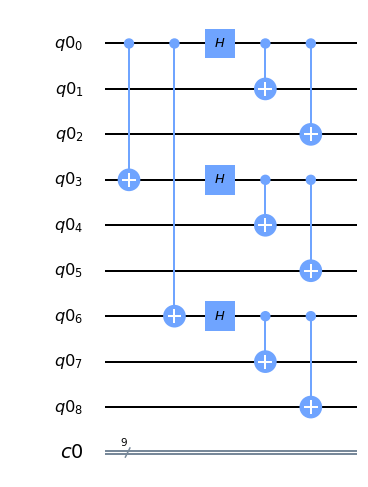

In [29]:
qc.cx(0,3)
qc.cx(0,6)
qc.h(0)
qc.h(3)
qc.h(6)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(3,4)
qc.cx(3,5)
qc.cx(6,7)
qc.cx(6,8)
qc.draw(output='mpl')

Now, let's print out the state vector.

In [30]:
from qiskit.visualization import plot_bloch_multivector
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 
# Do the simulation, returning the state vector
out_state = execute(qc,backend).result().get_statevector() 
# Display the output state vector
out_state

array([0.35355339+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.35355339+0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
      

Now, let's apply the first stabilizer of the stabilizer group given in the table to the code, and test the new output state for equality with the first one above. 

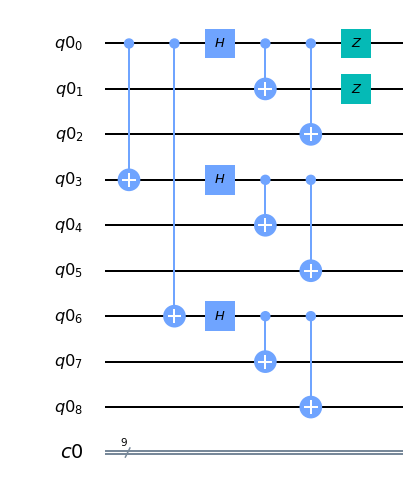

In [31]:
qc.z(0)
qc.z(1)
qc.draw(output='mpl')

In [32]:
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 
# Do the simulation, returning the state vector
out_state_2 = execute(qc,backend).result().get_statevector() 
# Display the output state vector

In [33]:
out_state == out_state_2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

This clearly shows that the first stabilizer generator in the table indeed preserves the state vector of the circuit. 

### Exercises

1. Follow the example above and verify that the other seven stabilizer generators $g_2, ..., g_8$ in fact preserve the state vector of the nine qubit Shor circuit. 

# Graph States

Graph states are closely related to stabilizer states in a way that we will explain momentarily. They were constructed in laboratory experiements using optical quantum computing at least as early at 2014, as described by the paper in Nature Communication ["Experimental demonstration of a graph state quantum error-correction code"](https://www.nature.com/articles/ncomms4658). In the paper [Fast simulation of stabilizer circuits using a graph state representation](https://arxiv.org/pdf/quant-ph/0504117.pdf), Anders and Briegel state the following, 

>"There is an intimate correspondence between stabilizer states (the class of states that can appear in a stabilizer circuit) and graph states: Not only is every graph state a stabilizer state, but also every stabilizer state is equivalent to a graph state in the following sense: Any stabilizer state can be transformed to a graph state by applying a tensor product of local Clifford (LC) operations."

These local Clifford operators are called **vertex operators**. Moreover, due to the **Gottesman-Knill Theorem**, which states that, 

>"an important subclass of quantum circuits can be simulated efficiently, namely
so-called *stabilizer circuits*."

Anders and Briegel develop a method of simulating quantum circuits that, 

>"for typical applications only requires time and space of $O(N \log(N))$."

This is important because it gives us a class of algorithms to use for testing functionality of quantum computers. We can ensure that our quantum computers are performing correctly with this class of codes because they can be simulated efficiently on classical computers. This also gives us a way to implement and test certain error correction protocols and test them on classical computers to make sure our quantum computers are performing as expected. In this section we will revisit the graph states that we discussed in the chapter on Entanglement and Bell states. Remember, Bell states are one of the simplest forms of entanglement. However, there are more complex notions of entanglement known as *multipartite entanglement*. Multipartite entanglement is exhibited by graph states and we wrote a function to create an arbitrary graph state on a quantum circuit in QISKit. We also wrote a similar function that would create a circuit with a classical register for storage of measurement data. The formal statement of the Gottesman-Knill Theorem is given by Anders and Briegel as follows, 

### Gottesman-Knill Theorem
**A quantum circuit using only the following elements (called a stabilizer circuit) can be simulated
efficiently on a classical computer:**
- preparation of qubits in computational basis states
- quantum gates from the Clifford group
- measurements in the computational basis

## Constructing Graph States in QISKit

Recall, from the chapter on entanglement and Bell states, we wrote the following function to construct graph states on an arbitrary graph:

In [34]:
def graph_state_measure(G):
    # Create a quantum register based on the number of nodes in G
    qr = QuantumRegister(len(G.nodes))
    cr = ClassicalRegister(len(G.nodes))
    # Create a circuit using the quantum register
    circ = QuantumCircuit(qr, cr)
    # For each vertex, apply a Hadamard gate
    for vertex in G.nodes:
        circ.h(vertex)
    # For each edge e={x,y} apply a controlled-Z gate on its vertices
    for x,y in G.edges:
        circ.cz(x,y)
    return circ

This function first applies the Hadamard gate to all qubits to initialize the state

\begin{align}
|+\rangle = \frac{(|0\rangle + |1\rangle)}{\sqrt{2}}.
\end{align}

It then applies the controlled-$Z$ gate to every pair of qubits connected by an edge in the given graph $G$. The graph state is then the unique $+1$-eigenvalue eigenstate of the operators

\begin{align}
S_v = X_v \otimes \left( \bigotimes_{u \in Adj(v)} Z_u \right)
\end{align}

where $v \in V$ is a vertex of the graph $G$, and $u \in Adj(v)$ is the set of all vertices adjacent to $v$, i.e. all vertices connected to $v$ by an edge in the graph $G$. 

### Using NetworkX to Create Graphs

[NetworkX](https://networkx.github.io/documentation/stable/tutorial.html) is a Python library used for various graph algorithms. It can easily construct graphs from a given set of nodes (vertices) and edges. To use NetworkX and to plot the graphs we create we will need the following imports. 

In [35]:
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

Now, let's create a graph $G$ using NetworkX. It will have the following vertex and edge set:

\begin{align}
V &= \{0,1,2,3,4,5\} \\
E &= \{(0, 1), (0, 3), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5)\}.
\end{align}

We will create a graph $G$, add the nodes (vertices), then add the edges, and finally we will draw the graph. 

/Users/amelieschreiber/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


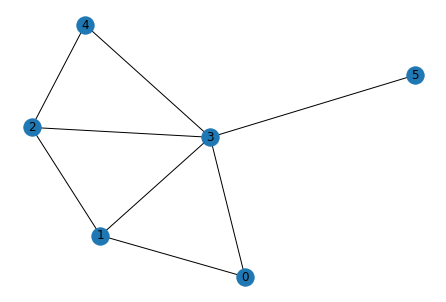

In [36]:
G = nx.Graph()
G.add_nodes_from([0,1,2,3,4,5])
G.add_edges_from([(0, 1), (0, 3), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5)])
nx.draw(G, with_labels=True)

We can always draw a graph in many different ways. Different embeddings into the plane may be better than others. For example, some applications may require no edge crossings. For others it may not matter. Not every graph can be drawn in the plane without edge crossings, but there is always a *unique minimal genus Riemann surface* for each graph that allows an embedding of the graph without edge crossings. For example, some graphs can be drawn on a torus without edge crossings, but not on a sphere or a flat sheet of paper. Let's have a look at two other drawing functions in NetworkX. 

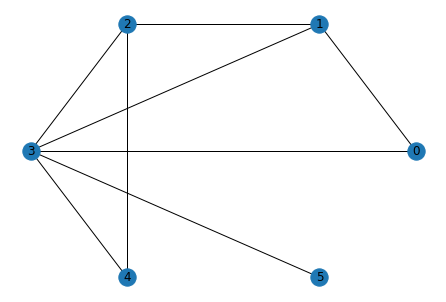

In [37]:
nx.draw_circular(G, with_labels=True)

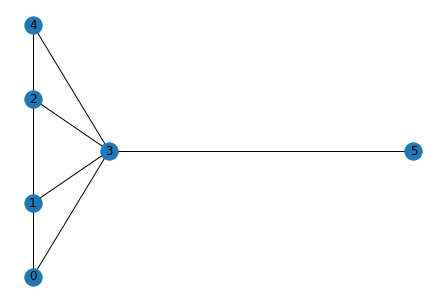

In [38]:
nx.draw_spectral(G, with_labels=True)

We can also construct graphs using their adjacency matrices. Adjacency matrices are always symmetric (equal to their transpose). 

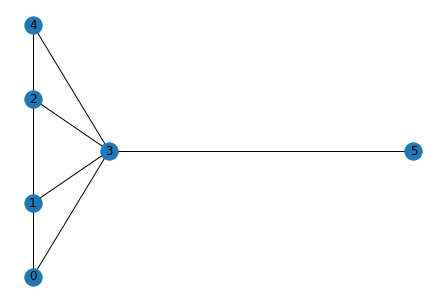

In [70]:
import numpy as np
A = np.array([[0, 1, 0, 1, 0, 0], 
              [1, 0, 1, 1, 0, 0],
              [0, 1, 0, 1, 1, 0],
              [1, 1, 1, 0, 1, 1],
              [0, 0, 1, 1, 0, 0], 
              [0, 0, 0, 1, 0, 0]])
G = nx.from_numpy_matrix(A)
nx.draw_spectral(G, with_labels=True)

Now, let's import QISKit and use our `graph_state_measure()` function to construct the corresponding graph state on a quantum circuit. 

In [71]:
from qiskit import *

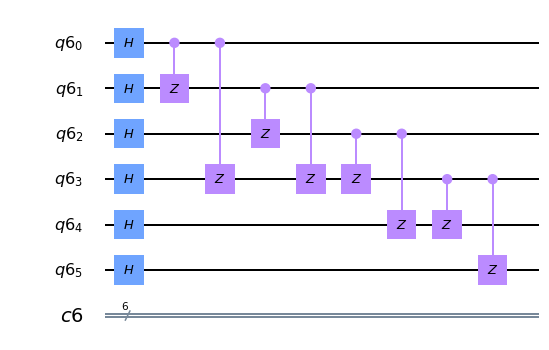

In [72]:
qc = graph_state_measure(G)
qc.draw(output='mpl')

The stabilizer generators for the graph state are as follows:

\begin{align}
g_0 &= X_0Z_1Z_3\\
g_1 &= Z_0X_1Z_2Z_3\\
g_2 &= Z_1X_2Z_3Z_4\\
g_3 &= Z_0Z_1Z_2X_3Z_4Z_5\\
g_4 &= Z_2Z_3X_4\\
g_5 &= Z_3X_5
\end{align}

Recall, in the notation $X_0Z_1Z_3 = X_0 \otimes Z_1 \otimes I_2 \otimes Z_3 \otimes I_4 \otimes I_5$, the subscipts indicate which qubit the operator is acting on, and we often leave out the identity operators. We can verify this as a stabilizer using QISKit by running the circuit on the `statevector_simulator` backend, printing the output state vector, and then applying the new circuit with the stabilizer applied to it, and printing its output vector. 

In [73]:
from qiskit.tools.visualization import plot_bloch_multivector
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 
# Do the simulation, returning the state vector
out_state = execute(qc,backend).result().get_statevector() 
# Display the output state vector
print(out_state)

[ 0.125+0.j  0.125+0.j  0.125+0.j -0.125+0.j  0.125+0.j  0.125+0.j
 -0.125+0.j  0.125+0.j  0.125+0.j -0.125+0.j -0.125+0.j -0.125+0.j
 -0.125+0.j  0.125+0.j -0.125+0.j -0.125+0.j  0.125+0.j  0.125+0.j
  0.125+0.j -0.125+0.j -0.125+0.j -0.125+0.j  0.125+0.j -0.125+0.j
 -0.125+0.j  0.125+0.j  0.125+0.j  0.125+0.j -0.125+0.j  0.125+0.j
 -0.125+0.j -0.125+0.j  0.125+0.j  0.125+0.j  0.125+0.j -0.125+0.j
  0.125+0.j  0.125+0.j -0.125+0.j  0.125+0.j -0.125+0.j  0.125+0.j
  0.125+0.j  0.125+0.j  0.125+0.j -0.125+0.j  0.125+0.j  0.125+0.j
  0.125+0.j  0.125+0.j  0.125+0.j -0.125+0.j -0.125+0.j -0.125+0.j
  0.125+0.j -0.125+0.j  0.125+0.j -0.125+0.j -0.125+0.j -0.125+0.j
  0.125+0.j -0.125+0.j  0.125+0.j  0.125+0.j]


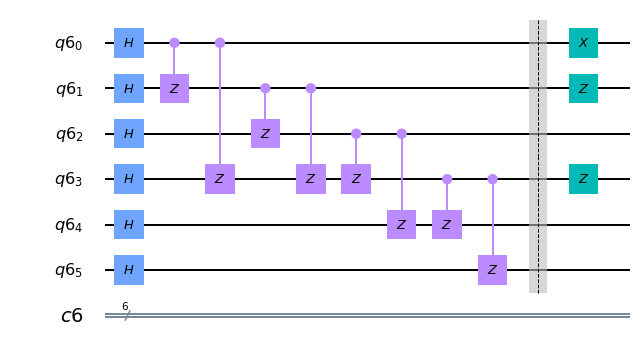

In [74]:
qc.barrier()
qc.x(0)
qc.z(1)
qc.z(3)
qc.draw(output ='mpl')

In [75]:
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 
# Do the simulation, returning the state vector
out_state2 = execute(qc,backend).result().get_statevector() 
# Display the output state vector
print(out_state2)

[ 0.125+0.j  0.125+0.j  0.125+0.j -0.125+0.j  0.125+0.j  0.125+0.j
 -0.125+0.j  0.125+0.j  0.125+0.j -0.125+0.j -0.125+0.j -0.125+0.j
 -0.125+0.j  0.125+0.j -0.125+0.j -0.125+0.j  0.125+0.j  0.125+0.j
  0.125+0.j -0.125+0.j -0.125+0.j -0.125+0.j  0.125+0.j -0.125+0.j
 -0.125+0.j  0.125+0.j  0.125+0.j  0.125+0.j -0.125+0.j  0.125+0.j
 -0.125+0.j -0.125+0.j  0.125+0.j  0.125+0.j  0.125+0.j -0.125+0.j
  0.125+0.j  0.125+0.j -0.125+0.j  0.125+0.j -0.125+0.j  0.125+0.j
  0.125+0.j  0.125+0.j  0.125+0.j -0.125+0.j  0.125+0.j  0.125+0.j
  0.125+0.j  0.125+0.j  0.125+0.j -0.125+0.j -0.125+0.j -0.125+0.j
  0.125+0.j -0.125+0.j  0.125+0.j -0.125+0.j -0.125+0.j -0.125+0.j
  0.125+0.j -0.125+0.j  0.125+0.j  0.125+0.j]


When dealing with large arrays, vectors, or matrices, testing if the two are equal might be hard visually. We could try the following to test equality of the two state vectors. However, as you will see when running it, you will get an output error. This is due to rounding errors, which are effectively zero for this example. 

In [81]:
out_state == out_state2

array([ True,  True,  True,  True,  True,  True, False, False,  True,
        True, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

To see that the `False` output for so many entries is due to an extremely tiny rounding error, run the following code to test equality of the two state vectors. 

In [79]:
np.testing.assert_array_equal(out_state, out_state2, err_msg='state vectors are not equal', verbose=True)

AssertionError: 
Arrays are not equal
state vectors are not equal
Mismatched elements: 50 / 64 (78.1%)
Max absolute difference: 2.77555756e-17
Max relative difference: 2.22044605e-16
 x: array([ 0.125+0.j,  0.125+0.j,  0.125+0.j, -0.125+0.j,  0.125+0.j,
        0.125+0.j, -0.125+0.j,  0.125+0.j,  0.125+0.j, -0.125+0.j,
       -0.125+0.j, -0.125+0.j, -0.125+0.j,  0.125+0.j, -0.125+0.j,...
 y: array([ 0.125+0.j,  0.125+0.j,  0.125+0.j, -0.125+0.j,  0.125+0.j,
        0.125+0.j, -0.125+0.j,  0.125+0.j,  0.125+0.j, -0.125+0.j,
       -0.125+0.j, -0.125+0.j, -0.125+0.j,  0.125+0.j, -0.125+0.j,...

As you can see above, the `Max absolute difference` between `out_state` and `out_state2` is only `2.77555756e-17`. For out purposes, this is effectively zero. So, we can run the following command to test equality of the two state vectors within some tolerances. The `rtol` is the **relative tolerance** and the `atol` is the **absolute tolerance**. Any choice smaller than the two values for `Max relative difference` and `Max absolute difference` above will now return `True`.  

In [80]:
np.isclose(out_state, out_state2, rtol=1e-05, atol=1e-08, equal_nan=False)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

This verifies that we indeed applied a true stabilizer by applying the gates $X_0Z_1Z_3$ to the graph state circuit. Now, let's verify one more stabilizer, say $Z_0X_1Z_2Z_3$. First, we apply these gates to the circuit. 

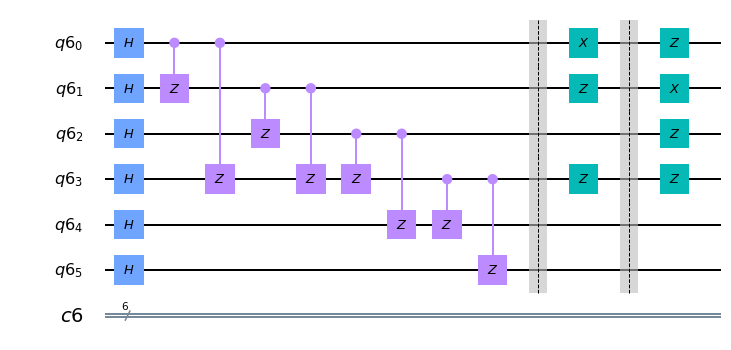

In [82]:
qc.barrier()
qc.z(0)
qc.x(1)
qc.z(2)
qc.z(3)
qc.draw(output='mpl')

Now, let's run this circuit on the backend `statevector_simulator`. 

In [85]:
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 
# Do the simulation, returning the state vector
out_state3 = execute(qc,backend).result().get_statevector() 
# Display the output state vector
print(out_state3)

[ 0.125+0.j  0.125+0.j  0.125+0.j -0.125+0.j  0.125+0.j  0.125+0.j
 -0.125+0.j  0.125+0.j  0.125+0.j -0.125+0.j -0.125+0.j -0.125+0.j
 -0.125+0.j  0.125+0.j -0.125+0.j -0.125+0.j  0.125+0.j  0.125+0.j
  0.125+0.j -0.125+0.j -0.125+0.j -0.125+0.j  0.125+0.j -0.125+0.j
 -0.125+0.j  0.125+0.j  0.125+0.j  0.125+0.j -0.125+0.j  0.125+0.j
 -0.125+0.j -0.125+0.j  0.125+0.j  0.125+0.j  0.125+0.j -0.125+0.j
  0.125+0.j  0.125+0.j -0.125+0.j  0.125+0.j -0.125+0.j  0.125+0.j
  0.125+0.j  0.125+0.j  0.125+0.j -0.125+0.j  0.125+0.j  0.125+0.j
  0.125+0.j  0.125+0.j  0.125+0.j -0.125+0.j -0.125+0.j -0.125+0.j
  0.125+0.j -0.125+0.j  0.125+0.j -0.125+0.j -0.125+0.j -0.125+0.j
  0.125+0.j -0.125+0.j  0.125+0.j  0.125+0.j]


Finally, let's test equality of `out_state` and `out_state3` taking into account the rounding errors. 

In [86]:
np.isclose(out_state, out_state3, rtol=1e-05, atol=1e-08, equal_nan=False)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

So, again, we have verified the equality of the two state vectors and we have shown that $Z_0X_1Z_2Z_3$ is indeed a stabilizer of the graph state. 

### Exercises

Verify the other four stabilizers for the graph state above:

1. $g_2 = Z_1X_2Z_3Z_4$
2. $g_3 = Z_0Z_1Z_2X_3Z_4Z_5$
3. $g_4 = Z_2Z_3X_4$
4. $g_5 = Z_3X_5$


In the following exercises, you may want to use the function `graph_state_measure()`. 

1. Create a graph state for the following graph. 

In [ ]:
G1 = nx.Graph()
G1.add_nodes_from([0,1,2,3])
G1.add_edges_from([(0,1), (1,2), (1,3), (2,3)])
nx.draw(G1, with_labels=True)

2. List all of the stabilizer generators for this graph state. There are four, one for each vertex of the graph.  
3. Verify the stabilizers for this graph state. 
4. Create a graph state in QISKit for the following graph.

In [ ]:
G2 = nx.Graph()
G2.add_nodes_from([0,1,2,3,4])
G2.add_edges_from([(0,1), (1,2), (1,3), (1,3), (2,3), (2,4), (3,4)])
nx.draw(G2, with_labels=True)

5. List all of the stabilizer generators for this graph state. There are five, one for each vertex of the graph.  
6. Verify the stabilizers for this graph state. 
7. Use the following NumPy matrix as an adjacency matrix to create a graph and draw it in NetworkX.

In [ ]:
A= np.matrix([[0., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
              [1., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
              [0., 1., 0., 1., 0., 0., 0., 1., 0., 0.],
              [0., 0., 1., 0., 1., 0., 0., 0., 1., 0.],
              [1., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
              [1., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
              [0., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
              [0., 0., 1., 0., 0., 1., 0., 0., 0., 1.],
              [0., 0., 0., 1., 0., 1., 1., 0., 0., 0.],
              [0., 0., 0., 0., 1., 0., 1., 1., 0., 0.]])

8. Use the previous graph you constructed in NetworkX to construct a graph state in QISKit. 
9. List all of the stabilizer generators for this graph state. 
10. Verify the stabilizers for this graph state. 

## Entanglement and Measurement of Graph States

The entanglement between the qubits can be read off from the graph, but they can also be seen in the controlled-$Z$ gates. Any two qubits that are linked by a controlled-$Z$ gate are entangled. Furthermore, applying controlled-$Z$ gate to a graph state toggles and edge. In other words, if the edge was already there, the controlled-$Z$ deletes it, and if it was not already present in the graph state then it is created. Any two qubits connected by an edge in the graph are entangled. Measuring a single qubit in the $Z$-basis will destoy the links connecting that node (or qubit) to the rest of the qubits in the graph. It is effectively the same as removing that node and all edges connected to it from the graph, without effecting the other qubits. If the outcome of the $Z$-basis measurement is $|0\rangle$, we get exactly the graph state given by removing that qubit and all edges connected to it from the graph. If the outcome is $|1\rangle$, we need to correct via a $Z$-gate on all qubits that were adjacent to the qubit we measured. We can measure in other bases too though. This is one of the key ideas used in **one-way Measurement Based Quantum Computing** or **MBQC**. In the article ["Quantum computation by local measurement"](https://arxiv.org/pdf/1208.0041.pdf), Raussendorf and Wei give a good introduction to the MBQC model of quantum computation, explaining, 

>"In the one-way MBQC, the process of computation is driven solely by local measurements,
applied to a highly entangled resource state. This is in stark contrast to the (standard)
circuit model, where the quantum is driven by elementary steps of unitary evolution, socalled quantum gates. In the MBQC, after a highly entangled resource state such as a 2D
cluster state has been created, the local systems, say qubits, are measured individually
in certain bases and a prescribed temporal order. The choice of measurement bases specifies
which quantum algorithm is being implemented. The measurement outcomes cannot be
chosen; they are individually random. This randomness can be prevented from creeping
into the logical processing by adjusting measurement bases according to previously obtained
measurement outcomes. Finally, the computational output is produced by correlations of
measurement outcomes."

They go on to explain, 

>"The scheme of *measurement-based quantum computation* can simplify the architecture of a quantum computer since it reduces the requirements on the interaction between qubits. First, instead of tunable interactions between selected pairs of qubits, MBQC only requires a translation-invariant, nearest-neighbor Ising coupling. This interaction is highly scalable and parallelized, and requires no control other than an on/off switch."

Graph states, which generalize and include the cluster states mentioned above, are uniquely suited for performing Measurement Based Quantum Computing. As an example of measuring in a different basis, we can define a function that measures the circuit in the $X$-basis as follows:

In [46]:
def x_measurement(circuit,qubit,cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    circuit.h(qubit)
    circuit.measure(qubit, cbit)
    circuit.h(qubit)
    return circuit

This works because conjugating by the Hadamard gate gives us the identity, 

\begin{align}
HZH^{\dagger} = HZH = X.
\end{align}

We can apply this function to qubit-$5$ and store it in the corresponding classical bit. Let's recreate the graph state, then apply the `x_measurement()` function.

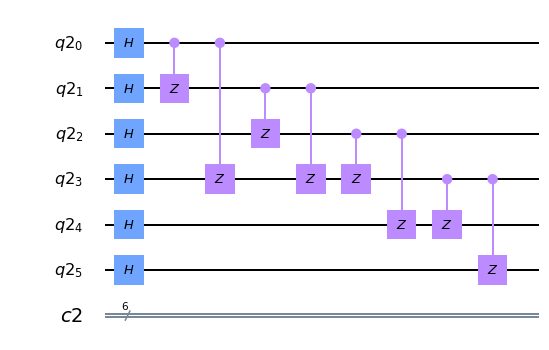

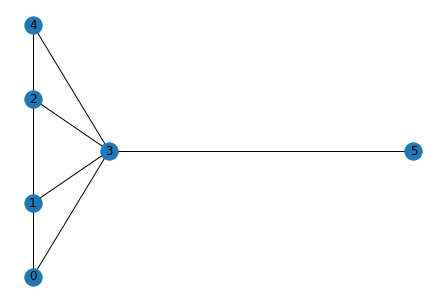

In [47]:
A = np.array([[0, 1, 0, 1, 0, 0], 
              [1, 0, 1, 1, 0, 0],
              [0, 1, 0, 1, 1, 0],
              [1, 1, 1, 0, 1, 1],
              [0, 0, 1, 1, 0, 0], 
              [0, 0, 0, 1, 0, 0]])
G = nx.from_numpy_matrix(A)
nx.draw_spectral(G, with_labels=True)

qc = graph_state_measure(G)
qc.draw(output='mpl')

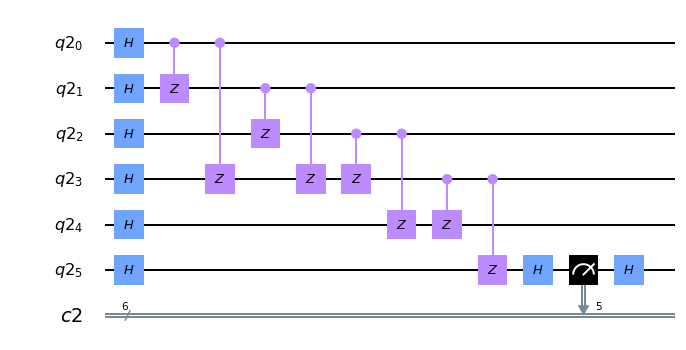

In [48]:
x_measurement(qc, 5, 5)
qc.draw(output='mpl')

This will give us either $|+\rangle$ or $|-\rangle$ for this qubit, and will destroy its entanglement with the rest of the qubits. However, the edges that are not connected to this qubit will remain and we will still have five other entangled qubits remaining. If we use the `statevector_simulator` backend in QISKit, we can print out the state vectors on the Bloch sphere. There are notions of [**measurement based quantum computation (MBQC)**](https://en.wikipedia.org/wiki/One-way_quantum_computer) which we will investigate next. 

>"The **one-way** or **measurement based quantum computer (MBQC)** is a method of quantum computing that first prepares an entangled resource state, usually a *cluster state* or *graph state*, then performs single qubit measurements on it. It is "one-way" because the resource state is destroyed by the measurements. The outcome of each individual measurement is random, but they are related in such a way that the computation always succeeds. In general the choices of basis for later measurements need to depend on the results of earlier measurements, and hence the measurements cannot all be performed at the same time."

Notice how in the output drawing of the state vectors on the Bloch spheres, we get a result of $|+\rangle$ or $|-\rangle$ on qubit-$5$ which is to be expected sinc we measured it in the $X$-basis, but we also get an output vector in the $|0\rangle$ or $|1\rangle$ state ($Z$-basis) on qubit-$3$. If we measure $|+\rangle$ for qubit-$5$, we will get $|0\rangle$ for qubit-$3$. If we measure $|-\rangle$ for qubit-$5$, then we get $|1\rangle$ for qubit-$3$. This means qubit-$3$ is in a superposition with respect to the $X$-basis, and so if we measure it in the $X$-basis, we have a $50/50$ chance of getting $|+\rangle$ or $|-\rangle$. We still know nothing of the other qubit states. Moreover, measurement of qubit-$3$ would still tell us nothing of the other four remaining qubits. 

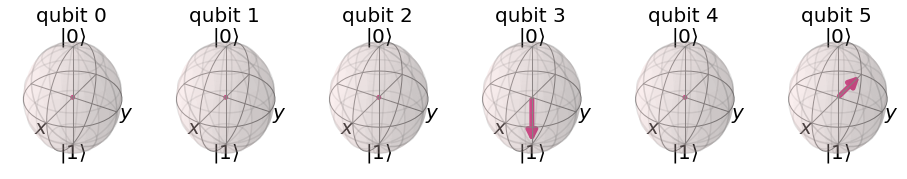

In [49]:
from qiskit.tools.visualization import plot_bloch_multivector
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 
# Do the simulation, returning the state vector
out_state = execute(qc,backend).result().get_statevector() 
# Display the output state vector
plot_bloch_multivector(out_state) 

In *measurement based quantum computing* we perform measurement on a single qubit once we have chose an ordering of the qubits. The next qubit in the ordering is measured in a basis that depends on the outcome of the previous measurement. In this way, measurement transports information around through the qubits in the graph state in much the same way as teleportation in the Bell states we discussed in the chapter on entanglement. Since each measurement is probablistic, running the algorithm a second time may result in different measurements along the way, but the problem is set up so that the outcome after all measurements is performed is the same. Let's have a look at another graph state. 

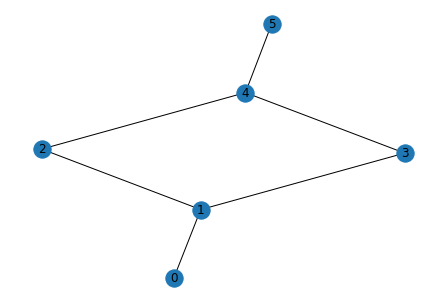

In [50]:
G = nx.Graph()
G.add_nodes_from([0,1,2,3,4,5])
G.add_edges_from([(0,1), (1,2), (1,3), (2,4), (3,4), (4,5)])
nx.draw(G, with_labels=True)

We can use our function `graph_state_measure()` to create the corresponding quantum circui. 

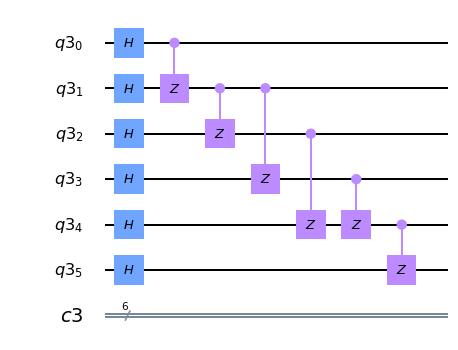

In [51]:
qc = graph_state_measure(G)
qc.draw(output='mpl')

Let's measure qubit-$0$ in the $X$-basis. 

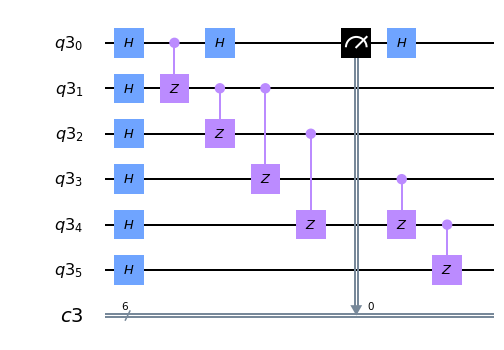

In [52]:
x_measurement(qc, 0, 0)
qc.draw(output='mpl')

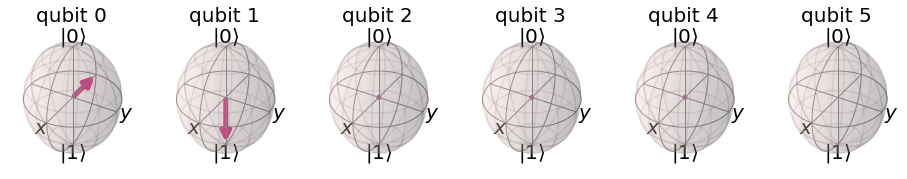

In [53]:
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 
# Do the simulation, returning the state vector
out_state = execute(qc,backend).result().get_statevector() 
# Display the output state vector
plot_bloch_multivector(out_state) 

Notice how the state of qubit-$1$ is now known *in the $Z$-basis*. If we measure in the $X$-basis though, it is in superposition, so the outcome will be probabilistic.

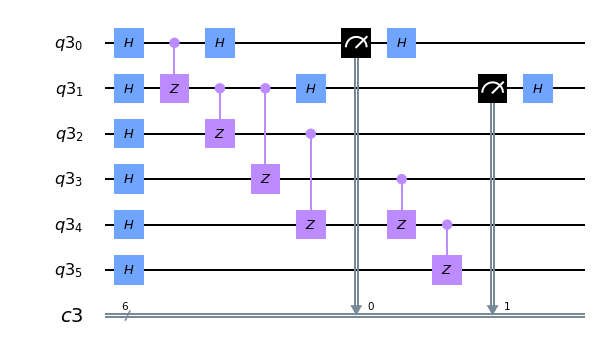

In [54]:
x_measurement(qc, 1, 1)
qc.draw(output='mpl')

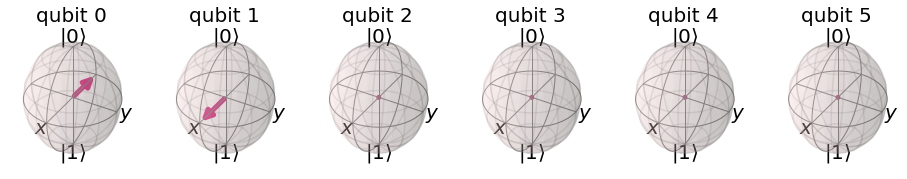

In [55]:
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 
# Do the simulation, returning the state vector
out_state = execute(qc,backend).result().get_statevector() 
# Display the output state vector
plot_bloch_multivector(out_state) 

The outcome of the above measurement will always be either $|+\rangle$ or $|-\rangle$ each with probability $1/2$. Let's measure qubit-$2$ now. 

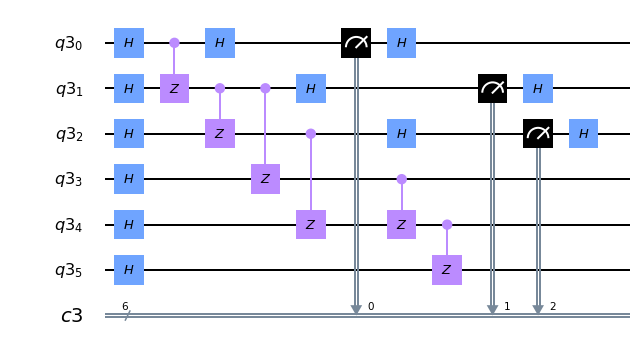

In [56]:
x_measurement(qc, 2, 2)
qc.draw(output='mpl')

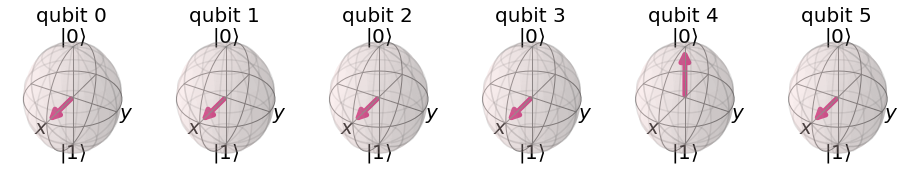

In [57]:
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 
# Do the simulation, returning the state vector
out_state = execute(qc,backend).result().get_statevector() 
# Display the output state vector
plot_bloch_multivector(out_state) 

Notice how measuring qubit-$2$ also gives us the state of qubit-$3$ and qubit-$5$ in the $X$-basis. We also know qubit-$4$, but in the $Z$-basis. So measuring qubit-$4$ will be probabilistic with outcome either $|+\rangle$ or $|-\rangle$ each with porbability $1/2$. However, measuring qubit-$3$ and qubit-$5$ will return the same values we already have for those and they will not be probabilistic.

In the paper, ["Verifiable fault-tolerance in measurement-based quantum computation"](https://arxiv.org/pdf/1610.05216.pdf), the authors describe the importance of measurement based quantum computation as a verification tool for quantum computers, 

>Quantum systems, in general, output data that cannot be simulated efficiently by a classical
computer, and hence is useful for solving certain mathematical problems and simulating quantum
many-body systems. This also implies, unfortunately, that verification of the output of the quantum
systems is not so trivial, since predicting the output is exponentially hard. As another problem,
quantum system is very delicate for noise and thus needs error correction. Here we propose a
framework for verification of the output of fault-tolerant quantum computation in the measurementbased model. Contrast to existing analyses on fault-tolerance, we do not assume any noise model on
the resource state, but an arbitrary resource state is tested by using only single-qubit measurements
to verify whether the output of measurement-based quantum computation on it is correct or not. The
overhead for verification including classical processing is linear in the size of quantum computation.
Since full characterization of quantum noise is exponentially hard for large-scale quantum computing
systems, our framework provides an efficient way of practical verification of experimental quantum
error correction. Moreover, the proposed verification scheme is also compatible to measurement-only
blind quantum computation, where a client can accept the delegated quantum computation even
when a quantum sever makes deviation, as long as the output is correct."

Measurement protocols for measurement based quantum computing can be a little involved and complicated. The basic idea is that entanglement is used as a resource and the principles of EPR-state (or Bell states) used in quantum teleportation are applied using sequential measurement of qubits. This will be covered later on. 